In [1]:
try:
    import xarray
except ModuleNotFoundError:
    !sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet xarray)"
    pass

In [2]:
#
import numpy as np
print("numpy version=", np.__version__)

#
import xarray as xr
print("xarray version=", xr.__version__)

numpy version= 1.26.4
xarray version= 2024.7.0


In [ ]:
# from IPython.display import HTML, display

# display(HTML("<style>.container { width:77% !important; }</style>"))

# Overview: why xarray?

From https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html

- `numpy` N-dim arrays (aka tensors) are used in many parts of computational science

- `numpy` provides raw N-dimensional arrays
- Real-world datasets need labels to encode information about how array values map to actual data
- `xarray` adds labels (e.g., dimensions, coordinates, attributes) to `numpy` N-dim arrays

- `xarray`:
    - applies operations over dimensions by name
    - uses dimension names (e.g., `dim='time'` vs `axis=0`)
    - selects values by label (instead of integer location)
    - vectorizes operations based on dimension names and not shape
    - implements split-apply-combine paradigm

## Core data structures
- `DataArray` is labeled N-dimensional array
    - generalizes `pd.Series` to N dimensions
    - attaches labels to `np.ndarray`

- `Dataset` is dict-like container of `DataArray`
    - arrays in `Dataset` can have different number of dimensions

- `xarray` integrates with the Pydata ecosystem (`numpy`, `pandas`, `Dask`, `matplotlib`)
    - It's easy to get data in and out

# Quick overview

https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html

## Create a DataArray

In [13]:
np.random.seed(314)

# Create a 2D array.
data = np.array([[1, 2, 3], [4, 5, 6]])
print("data=", data)

# Create an xarray.
data = xr.DataArray(
    data,
    # - Assign x and y to the dimensions.
    dims=("x", "y"),
    # - Assign coordinate labels 10 and 20 to locations along x dimension.
    coords={"x": [10, 20]},
)

data= [[1 2 3]
 [4 5 6]]


In [11]:
# Show as HTML.
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

- `data` has 2 dimensions `x`, `y`, with 2 and 3 elements, respectively
- The `x` dimension has coordinates/names
    - `x` has an Pandas index using ints
- The `y` domension has no coordinates
- `data` has no attributes

In [9]:
print(type(data))

<class 'xarray.core.dataarray.DataArray'>


In [10]:
# Print as string.
print(data)

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y


In [17]:
# Extract the numpy data structure.
vals = data.values
print("type(vals)=", type(vals))
print("vals=\n", vals)

type(vals)= <class 'numpy.ndarray'>
vals=
 [[1 2 3]
 [4 5 6]]


In [19]:
# Extract the dimension names which are a tuple.
print(data.dims)

('x', 'y')


In [24]:
# Extract the coordinates.
print("# type(data.coords)=\n%s" % type(data.coords))
print("# data.coords=\n%s" % data.coords)

# type(data.coords)=
<class 'xarray.core.coordinates.DataArrayCoordinates'>
# data.coords=
Coordinates:
  * x        (x) int64 16B 10 20


In [25]:
# Extract the attributes, which can store arbitrary metadata.
data.attrs

{}

### Indexing

- Slicing an xarray returns another xarray with the slice

In [26]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [28]:
# Slice like NumPy-style.
# Set the x dimension to be 0, so get the first row.
data[0, :]

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [29]:
# Set the x dimension to be 1 (like numpy), so get the second row.
data[1, :]

<xarray.DataArray (y: 3)> Size: 24B
array([4, 5, 6])
Coordinates:
    x        int64 8B 20
Dimensions without coordinates: y

In [30]:
# loc, "location": select by coordinate label (like pandas)
# Get data along the first dimension for the index called `10`.
data.loc[10]

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [31]:
# isel, "integer select": select by dimension name and integer label
# Get data along the dimension `x` for the first index
data.isel(x=0)

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [32]:
# isel, "integer select": select by dimension name and integer label
# Get data along the dimension `y` for the second index
data.isel(y=1)

<xarray.DataArray (x: 2)> Size: 16B
array([2, 5])
Coordinates:
  * x        (x) int64 16B 10 20

In [33]:
# sel, "select", by dimension name and coordinate label
# Get data along the dimension `x` and the index `10`
data.sel(x=10)

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

### Attributes

- You can add metadata attributes to `DataArray` or to coordinates
- Some of them are used automatically in the plots

In [34]:
data.attrs["long_name"] = "random_velocity"
data.attrs["units"] = "m/s"
data.attrs["description"] = "A random var created as an example"

print(data.attrs)

{'long_name': 'random_velocity', 'units': 'm/s', 'description': 'A random var created as an example'}


In [35]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example

In [36]:
data.x.attrs["units"] = "x units"

In [37]:
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example

### Computation

- Data arrays work very similarly to numpy ndarrays

In [39]:
# Sum 10 element-wise.
data + 10

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[11, 12, 13],
       [14, 15, 16]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [41]:
# Sum elements across all the dimensions
data.sum()

<xarray.DataArray ()> Size: 8B
array(21)

In [43]:
# Compute mean along one dimension by label.
data.mean(dim="x")

<xarray.DataArray (y: 3)> Size: 24B
array([2.5, 3.5, 4.5])
Dimensions without coordinates: y

In [45]:
# Transpose.
data.T

<xarray.DataArray (y: 3, x: 2)> Size: 48B
array([[1, 4],
       [2, 5],
       [3, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example

- Arithmetic operations broadcast based on dimension name
- You don't need to insert dummy dimensions for alignment

In [56]:
# Create a 1-vector with coordinates along the `y` axis.
a = xr.DataArray([1, 2, 3], {"y": [0, 1, 2]})

# Create a 1-vector with dimension `z` and no coordinates.
b = xr.DataArray([10, 20, 30, 40], dims="z")

In [57]:
display(a)
display(b)

<xarray.DataArray (y: 3)> Size: 24B
array([1, 2, 3])
Coordinates:
  * y        (y) int64 24B 0 1 2

<xarray.DataArray (z: 4)> Size: 32B
array([10, 20, 30, 40])
Dimensions without coordinates: z

In [58]:
# The broadcast happens along the dimensions by name, without worrying about the order.
a + b

<xarray.DataArray (y: 3, z: 4)> Size: 96B
array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43]])
Coordinates:
  * y        (y) int64 24B 0 1 2
Dimensions without coordinates: z

The dimensions don't have the same name.

In [60]:
# Create a 1-vector with coordinates along `z`.
a = xr.DataArray([1, 2, 3], {"z": [0, 1, 2]})
# Create a 1-vector with `z` dimension.
b = xr.DataArray([10, 20, 30], dims="z")

a + b

<xarray.DataArray (z: 3)> Size: 24B
array([11, 22, 33])
Coordinates:
  * z        (z) int64 24B 0 1 2

### Plotting

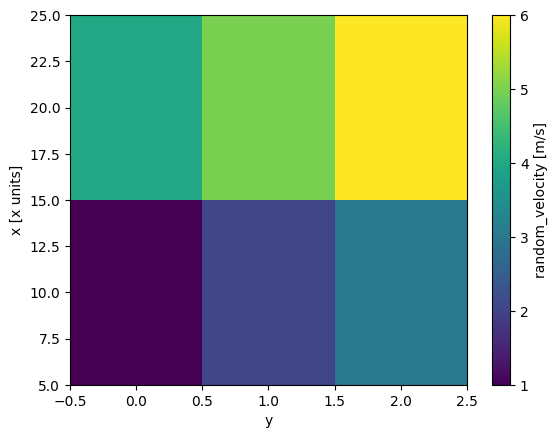

In [63]:
# The plot uses the attributes.
data.plot();

### Pandas interaction

In [65]:
# From xarray to multi-index pd.Series.
srs = data.to_series()
srs

x   y
10  0    1
    1    2
    2    3
20  0    4
    1    5
    2    6
dtype: int64

In [66]:
# From pd.Series to xarray.
srs.to_xarray()

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
  * y        (y) int64 24B 0 1 2

In [67]:
df = data.to_dataframe(name="hello")
df

hello
x  y       
10 0      1
   1      2
   2      3
20 0      4
   1      5
   2      6

## Datasets

- `xarray.Dataset` is a dict-like container of aligned `xarray.DataArray`
    - It is like a generalization of a `pd.DataFrame`
- Variables in a `Dataset` can have different dimensions and dtypes
- If two variables have the same dimension (e.g., `x`) the dimension must be identical in both variables

### Build from dictionary

In [87]:
# Create a dictionary with heterogeneous data.
dict_ = dict(foo=data, bar=("x", [1, 2]), baz=np.pi)
print(dict_)

{'foo': <xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[1, 2, 3],
       [4, 5, 6]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    units:        m/s
    description:  A random var created as an example, 'bar': ('x', [1, 2]), 'baz': 3.141592653589793}


In [88]:
# Create a `xarray.Dataset` from the dictionary.
# - `foo` is a DataArray (with 2 dimensions `x` and `y`)
# - `bar` is a one-dimensional array with dimension `x`
# - `baz` is a scalar (with no dimensions)
ds = xr.Dataset(dict_)
ds

<xarray.Dataset> Size: 88B
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) int64 48B 1 2 3 4 5 6
    bar      (x) int64 16B 1 2
    baz      float64 8B 3.142

### Extract one variable

In [96]:
# Extract one variable from the dataset.
ds["foo"]
# This is equivalent to
# ds.foo
assert str(ds.foo) == str(ds["foo"])

In [97]:
ds["bar"]

<xarray.DataArray 'bar' (x: 2)> Size: 16B
array([1, 2])
Coordinates:
  * x        (x) int64 16B 10 20

In [98]:
ds["baz"]

<xarray.DataArray 'baz' ()> Size: 8B
array(3.14159265)

### Extract multiple vars

In [103]:
ds[["foo", "bar"]].to_dataframe().values

array([[1, 1],
       [2, 1],
       [3, 1],
       [4, 2],
       [5, 2],
       [6, 2]])

### Slicing

In [99]:
# Both `foo` and `bar` variables have the same coordinate `x`, so we can use `x` to slice the data.
ds["x"]
# ds.bar["x"]
# ds.foo["x"]

<xarray.DataArray 'x' (x: 2)> Size: 16B
array([10, 20])
Coordinates:
  * x        (x) int64 16B 10 20
Attributes:
    units:    x units

### Computation

Most of the computations for `DataArray` are possible also on `Dataset`

# FAQ

https://docs.xarray.dev/en/stable/getting-started-guide/faq.html

- `xarray` API is inspired by Pandas
- Pandas dataframe is focused on low-dimensional tabular data, where there is a rows-and-columns structure
    - Pandas N-dimensional panels were deprecated in favor of `xarray.DataArray`
- `xarray` allows ndim > 2 dimensional array for which the order of dimensions doesn't really matter
    - E.g., a movie is represented as a 4-dim array with time, row, column, color

# User Guide

https://docs.xarray.dev/en/stable/user-guide/index.html

## Terminology

https://docs.xarray.dev/en/stable/user-guide/terminology.html

- `DataArray`
    - A multidimensional array with labeled dimensions
    - It contains metadata, such as dimension, names, coordinates, and attributes to the data

- `Dataset`
    - A dict-like collection of `DataArray` objects with aligned dimensions

- Dimension
    - The dimension of data is related to the number of degrees of freedom of it

- Dimension axis
    - Set of all points in which all but one of the degrees of freedom is fixed
    - Each dimension axis has a name (e.g., "x dimension")
    - The dimensions are stored in `da.dims`

- Coordinate
    - An array that labels a dimension (like tick labels along a dimension)
    - A dimension can have a coordinate or not
    - A dimension can have an index (to use selection and alignment) or not